#Name: Prince Raj
#Assessment - 3

#  1) Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2) Importing dataset

In [4]:
df=pd.read_csv("./Titanic-Dataset.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3) Checking Null-Value

In [6]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# 4) Data Visualization

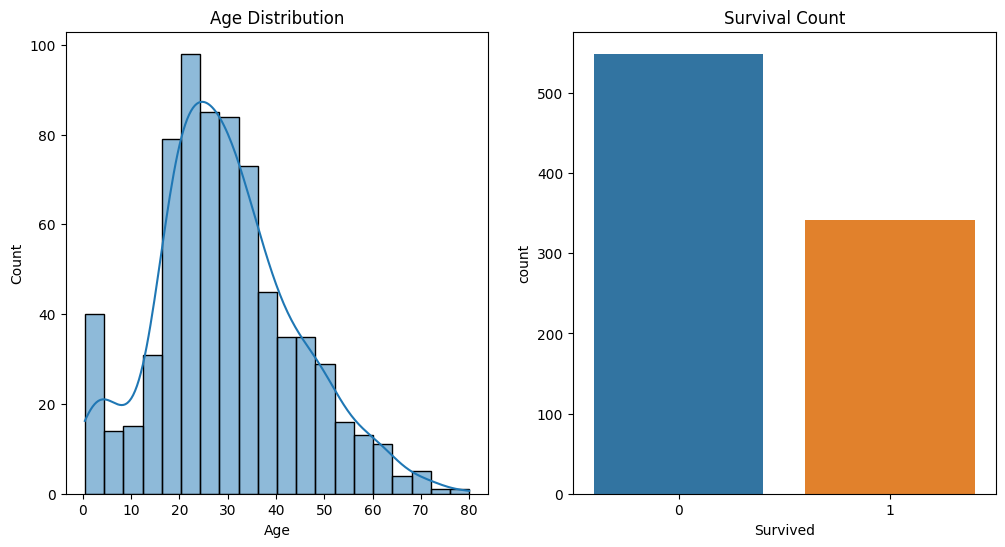

In [7]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Age'].dropna(), bins=20, kde=True)
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')

plt.show()

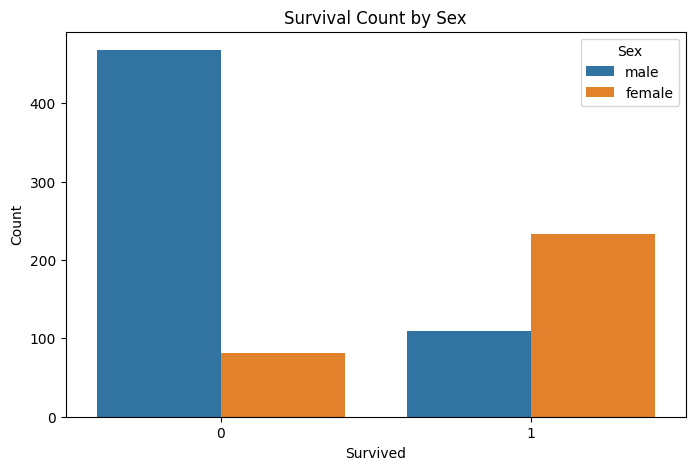

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Sex')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

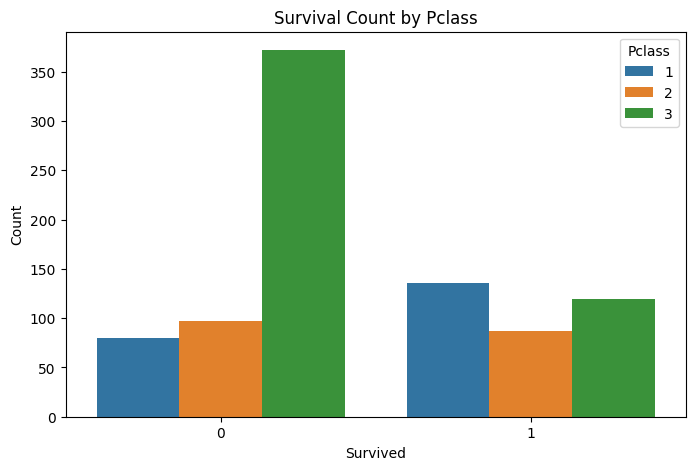

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Count by Pclass')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

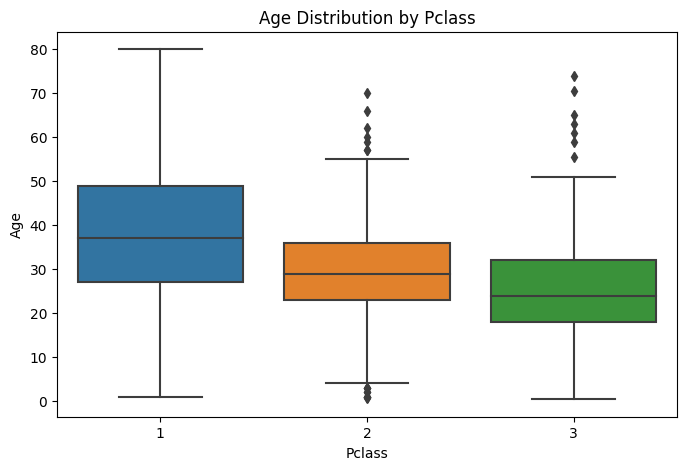

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age Distribution by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

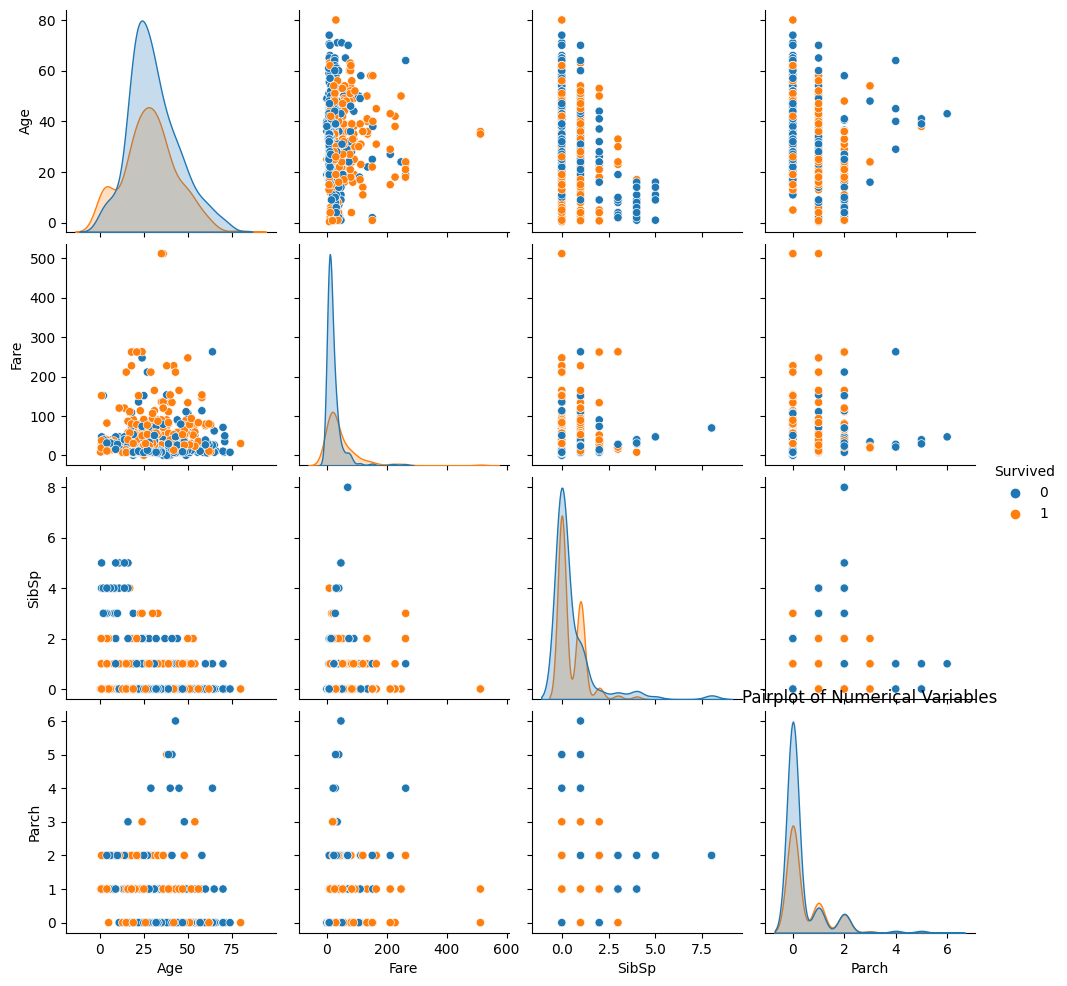

In [11]:
sns.pairplot(df[['Age', 'Fare', 'SibSp', 'Parch', 'Survived']], hue='Survived')
plt.title('Pairplot of Numerical Variables')
plt.show()

# Dealing with Null values.
##### PassengerId      0
###### Survived         0
##### Pclass           0
##### Name             0
##### Sex              0
##### Age            177
##### SibSp            0
##### Parch            0
##### Ticket           0
##### Fare             0
##### Cabin          687
##### Embarked         2

In [12]:
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

df['Cabin'].fillna('Unknown', inplace=True)

mode_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_embarked, inplace=True)

In [13]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


#5) Outlier Detection

<Axes: xlabel='Age'>

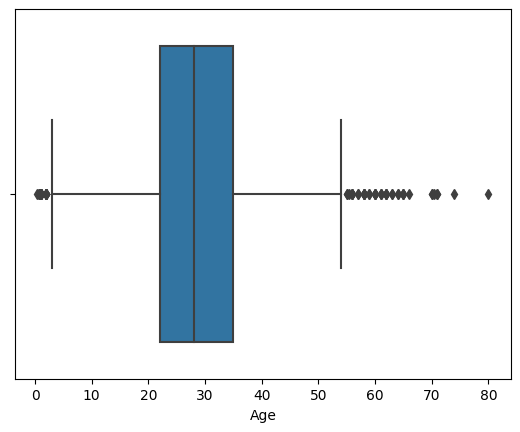

In [14]:
sns.boxplot(x=df['Age'])

<Axes: xlabel='SibSp'>

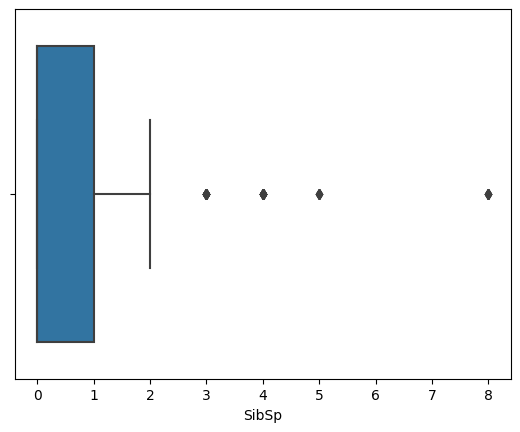

In [19]:
sns.boxplot(x=df['SibSp'])

<Axes: xlabel='Fare'>

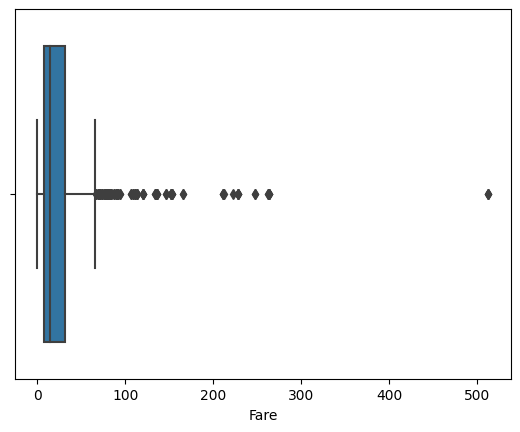

In [18]:
sns.boxplot(x=df['Fare'])

###Outliner Exist for all two cases.

# Splitting Dependent and Independent variables

In [20]:
# Independent Variables (Features)
X = df.drop('Survived', axis=1)  # Exclude the 'Survived' column

# Dependent Variable (Target)
y = df['Survived']

# Perform encoding

In [23]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X['Sex'] = label_encoder.fit_transform(X['Sex'])
X['Embarked'] = label_encoder.fit_transform(X['Embarked'])
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,Unknown,2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,2
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,Unknown,2


# Feature Scaling


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[['Age', 'Fare']] = scaler.fit_transform(X[['Age', 'Fare']])
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",1,-0.565736,1,0,A/5 21171,-0.502445,Unknown,2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.663861,1,0,PC 17599,0.786845,C85,0
2,3,3,"Heikkinen, Miss. Laina",0,-0.258337,0,0,STON/O2. 3101282,-0.488854,Unknown,2
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.433312,1,0,113803,0.420730,C123,2
4,5,3,"Allen, Mr. William Henry",1,0.433312,0,0,373450,-0.486337,Unknown,2


# Splitting Data into Train and Test

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Testing

In [29]:
X_train.shape

(712, 11)

In [30]:
X_test.shape

(179, 11)

In [31]:
y_train.shape

(712,)

In [32]:
y_test.shape

(179,)